In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib
data_dir = pathlib.Path("C:/Users/achin/PycharmProjects/PlanetIdentifier/Planets_and_Moons")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(256, 144),
  batch_size=32)

Found 1638 files belonging to 11 classes.
Using 1311 files for training.


In [3]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(256, 144),
  batch_size=32)

Found 1638 files belonging to 11 classes.
Using 327 files for validation.


In [4]:
class_names = train_ds.class_names
print(class_names)

['Earth', 'Jupiter', 'MakeMake', 'Mars', 'Mercury', 'Moon', 'Neptune', 'Pluto', 'Saturn', 'Uranus', 'Venus']


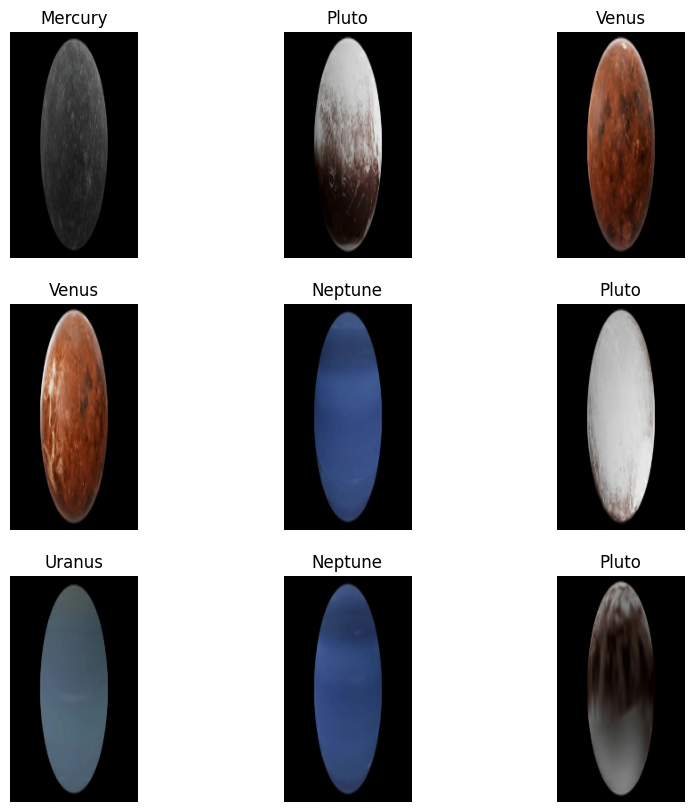

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [6]:
num_classes = 11

model = Sequential([

  layers.experimental.preprocessing.Rescaling(1./255, input_shape = (256,144,3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation = 'softmax')
])

In [7]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

In [8]:
epochs = 5
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/5


C:\Users\achin\AppData\Roaming\Python\Python39\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


41/41 [==============================] - 19s 432ms/step - loss: 1.5336 - accuracy: 0.4928 - val_loss: 0.6990 - val_accuracy: 0.7523
Epoch 2/5
41/41 [==============================] - 17s 426ms/step - loss: 0.2873 - accuracy: 0.8894 - val_loss: 0.2905 - val_accuracy: 0.9144
Epoch 3/5
41/41 [==============================] - 17s 408ms/step - loss: 0.1946 - accuracy: 0.9306 - val_loss: 0.1886 - val_accuracy: 0.9235
Epoch 4/5
41/41 [==============================] - 16s 393ms/step - loss: 0.1123 - accuracy: 0.9558 - val_loss: 0.0593 - val_accuracy: 0.9939
Epoch 5/5
41/41 [==============================] - 17s 401ms/step - loss: 0.0655 - accuracy: 0.9809 - val_loss: 0.1601 - val_accuracy: 0.9327


In [9]:
test_loss, test_acc = model.evaluate(val_ds, verbose=2)
print('\nTest accuracy:', test_acc)

11/11 - 1s - loss: 0.1601 - accuracy: 0.9327 - 999ms/epoch - 91ms/step

Test accuracy: 0.932721734046936


In [10]:
# import pickle
# pickle.dump(model,open('model.pkl','wb'))

In [11]:
# pickle.dump(data_dir,open('images.pkl','wb'))

In [13]:
tf.keras.models.save_model(model,'my_model.hdf5')